In [ ]:
# Loads the package
! pip install -q 'gwosc==0.5.4'
! pip install pycbc
! pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.6 MB/s eta 0:00:00


In [ ]:
import gwpy
from gwpy.timeseries import TimeSeries

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [ ]:
# Loads data into memory
filename = "challenge1.gwf"
channel = "H1:CHALLENGE1"
data = TimeSeries.read(filename, channel)

In [ ]:
# Defines sampling rate and duration
sampling_rate = data.sample_rate.value
duration = data.duration.value
# Prints sampling rate and duratio, the "f" inside print function
# denotes an f-string which allows to call the variables in curly brackets
print(f"Sampling Rate: {sampling_rate}")
print(f"Duration: {duration}")

Sampling Rate: 4096.0
Duration: 128.0


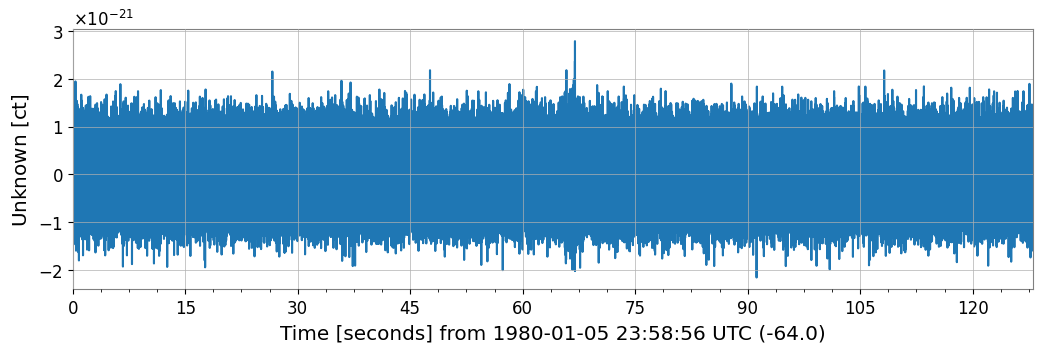

In [ ]:
# plots the data in the time domain (axis labels are incorrect)
plot = data.plot()

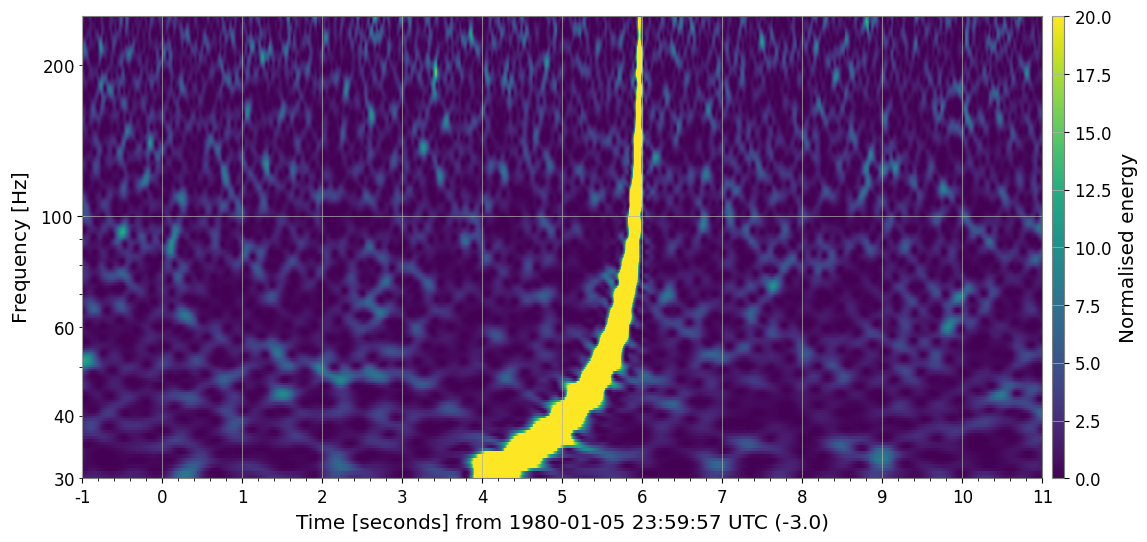

In [ ]:
# creates a spectrogram using a q-transform, frange sets the range of frequency
# and outseg sets the x range; after initial plotting, the ranges for both
# were chosen after some trial and error to obtain the best looking graph
q = data.q_transform(frange=(30, 250), outseg=(-4, 8))
plot = q.plot()
plot.colorbar(label="Normalised energy")
# sets the color limit s.t. the graph is more readable
plot.colorbars[0].mappable.set_clim(0,20)
ax = plot.gca()
# sets the y scale to logarithmic
ax.set_yscale("log")

In [ ]:
# Since the time in seconds should be read with -3s and the merger appears at time=6s on the graph,
# the merger actually occurs around time=3 s